## Table of Contents (ToC) <a class="anchor" id="TOC"></a>
* [Time-series Forecasting](#TSF)
 * [Loading basic dependencies](#TSF-lib)
 * [Loading Data](#TSF-data)
 * [Missing Values](#TSF-miss)
 * [Linear Imputation/Interpolation](#TSF-impute)
 * [Outliers](#TSF-outlier)
 * [Augmented Dickey-Fuller Test for Stationarity](#TSF-ADF)
 * [Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test](#TSF-KPSS)
 * [Converting Non Stationary to Stationary](#TSF-convert)
   * [BOX COX Transformation](#TSF-BoxCox)
   * [Differencing](#TSF-Diff)
   * [ADF Test](#TSF-ADFTest)
   * [KPSS Test](#TSF-KPSSTest)
 * [Auto Correleation Function (ACF)](#TSF-ACF)
 * [Partial Auto Correleation Function (PCF)](#TSF-PACF)

# Time-series Forecasting ([ToC](#TOC))<a class="anchor" id="TSF"></a>

## Loading basic dependencies ([ToC](#TOC))<a class="anchor" id="TSF-lib"></a>
* Exploratory Data Analysis: ipywidgets, sweetviz, ppscore
* Machine learning modeling: sklearn, imblearn

In [4]:
#loading basic dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # plt.style.available: To see other styles

import warnings
warnings.filterwarnings('ignore')

## Loading Data ([ToC](#TOC))<a class="anchor" id="TSF-data"></a>

In [6]:
#loading the data
data = pd.read_csv('/kaggle/input/shop-customers/Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')

#shape of the data
data.shape

(144, 1)

## Missing Values ([ToC](#TOC))<a class="anchor" id="TSF-miss"></a>

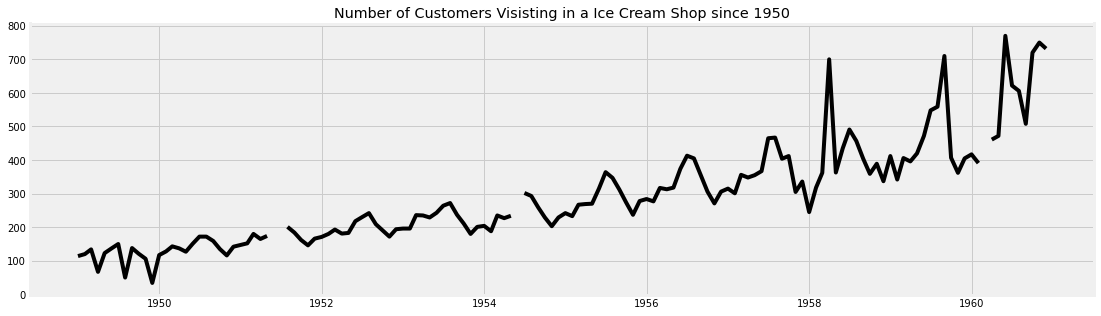

In [ ]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='black')
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

## Linear Imputation/Interpolation ([ToC](#TOC))<a class="anchor" id="TSF-impute"></a>



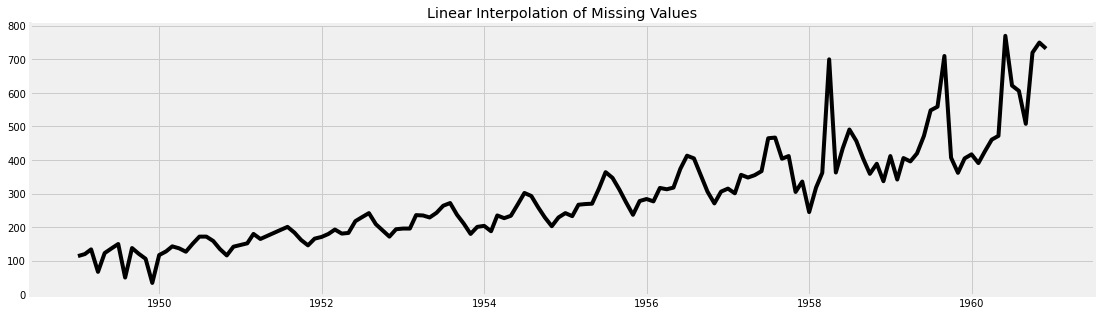

In [ ]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

## Outliers Treatment ([ToC](#TOC))<a class="anchor" id="TSF-outlier"></a>

In [ ]:
data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622

In [ ]:
#getting statistical information
data.describe()

,Customers,Customers_linear
count,140.000000,144.000000
mean,291.878571,291.194444
std,150.040592,148.877256
min,34.000000,34.000000
25%,180.000000,180.750000
50%,265.500000,265.500000
75%,364.750000,364.750000
max,770.000000,770.000000


## Time Series Decomposition

In [8]:
import statsmodels.api as sm

### Additive Seasonal Decomposition

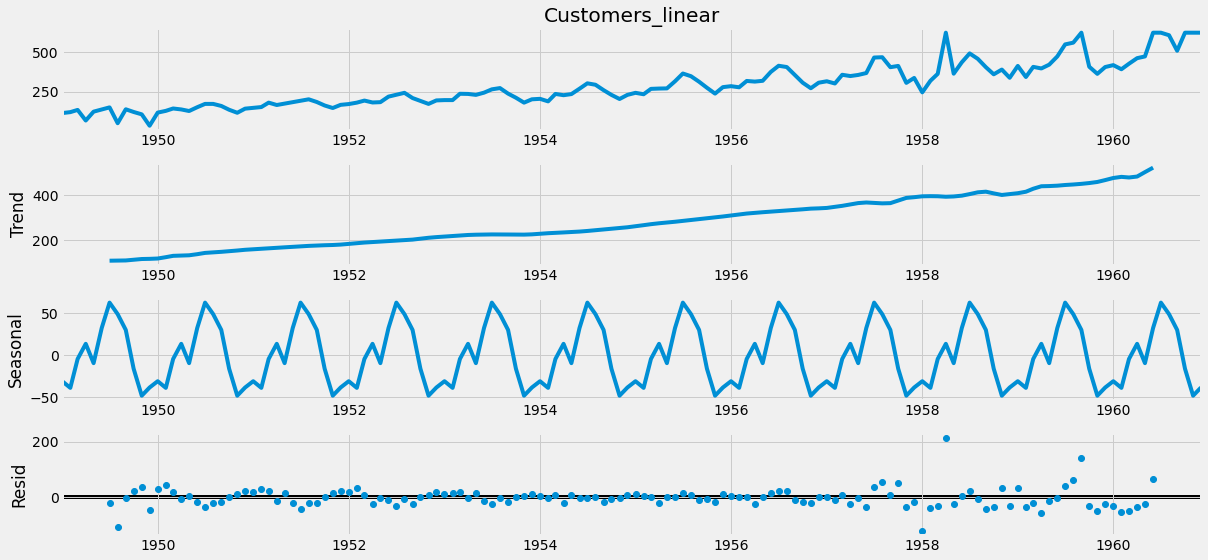

In [9]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='additive')
decomposition.plot()
                                          
plt.show()

### Multiplicative Seasonal Decomposition

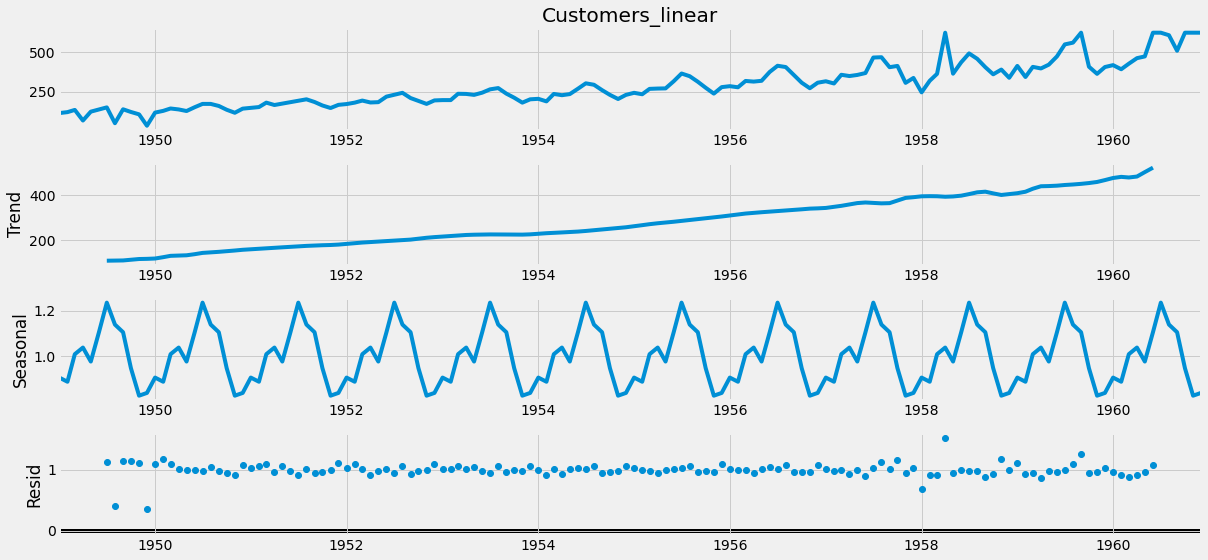

In [10]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='multiplicative')
fig = decomposition.plot()
plt.show()

## Stationarity Test ([ToC](#TOC))<a class="anchor" id="TSF-StationTestBefore"></a>

### Augmented Dickey-Fuller Test for Stationarity ([ToC](#TOC))<a class="anchor" id="TSF-ADF"></a>
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.
* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.




In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Customers_linear'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: 2.9806738090828993

n_lags: 1.0

p-value: 1.0

Critial Values:

   1%, -3.482087964046026

Critial Values:

   5%, -2.8842185101614626

Critial Values:

   10%, -2.578864381347275


* p-value is 1 and its value is larger than 0.05 , hence 
it fails to reject the null hypothesis. Hence, the data has a unit root and is non-stationary

* The mean value is not stationary.
* The variance is fluctating over time.




### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test ([ToC](#TOC))<a class="anchor" id="TSF-KPSS"></a>
The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

For KPSS test, 
* The Null Hypothesis : The series is stationary
when p-value >0.05
* Alternate Hypothesis: The series is not stationary
when p-value <= 0.5


In [ ]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(data['Customers_linear'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  



KPSS Statistic: 1.0606088884543792

p-value: 0.01

num lags: 14

Critial Values:

Critial Values:

   10%, 0.347

Critial Values:

   5%, 0.463

Critial Values:

   2.5%, 0.574

Critial Values:

   1%, 0.739


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value

  warn("p-value is smaller than the indicated p-value", InterpolationWarning)



We see that our p-value is less than 0.5 and hence it violates the Null Hypothesis, hence it is non-stationary 

## Converting Non Stationary to Stationary ([ToC](#TOC))<a class="anchor" id="TSF-convert"></a>

### BOX COX Transformation ([ToC](#TOC))<a class="anchor" id="TSF-BoxCox"></a>
* A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. 
* Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests.
* It is just a log transformation.

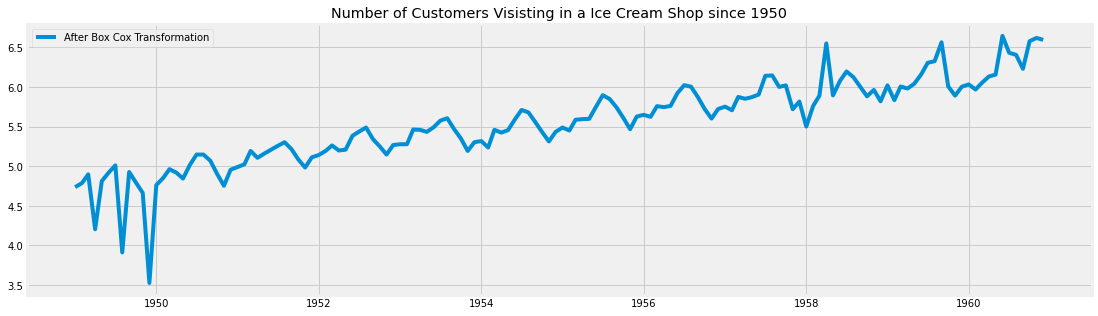

In [ ]:
from scipy.stats import boxcox
data_boxcox=pd.Series(boxcox(data['Customers_linear'],lmbda=0),index=data.index)
plt.plot(data_boxcox, label="After Box Cox Transformation")
plt.legend(loc='best')
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

### Differencing ([ToC](#TOC))<a class="anchor" id="TSF-Diff"></a>

Differencing stabilises the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality. 

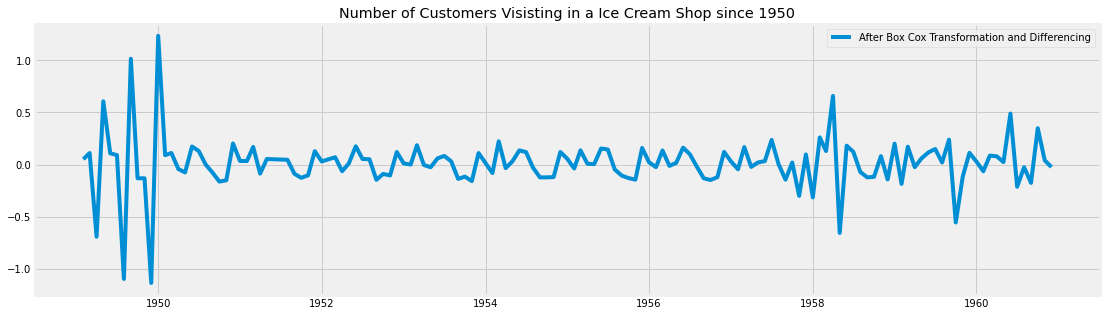

In [ ]:
data_boxcox_difference= pd.Series(data_boxcox-data_boxcox.shift(), index=data.index)
data_boxcox_difference.dropna(inplace=True)
plt.plot(data_boxcox_difference, label="After Box Cox Transformation and Differencing")
plt.legend()
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

## Stationarity Test after Conversion ([ToC](#TOC))<a class="anchor" id="TSF-StationTestAfter"></a>

### ADF Test ([ToC](#TOC))<a class="anchor" id="TSF-ADFTest"></a>

Checking stationary after transformation

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_boxcox_difference, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]:.20f}')
print(f'p-value: {result[1]:.20f}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -10.526510513706793

n_lags: 0.00000000000000000094

p-value: 0.00000000000000000094

Critial Values:

   1%, -3.4808880719210005

Critial Values:

   5%, -2.8836966192225284

Critial Values:

   10%, -2.5785857598714417


p-value is less than 0.05 hence it rejects the Null Hypothesis, hence it is stationary 

### KPSS Test ([ToC](#TOC))<a class="anchor" id="TSF-KPSSTest"></a>

Checking stationarity after transformation using KPSS

In [ ]:
from statsmodels.tsa.stattools import kpss
result = kpss(data_boxcox_difference)
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

KPSS Statistic: 0.07116934656329456

p-value: 0.1

num lags: 14

Critial Values:

Critial Values:

   10%, 0.347

Critial Values:

   5%, 0.463

Critial Values:

   2.5%, 0.574

Critial Values:

   1%, 0.739


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value

  warn("p-value is greater than the indicated p-value", InterpolationWarning)


We see that our p-value is greater than  0.05 and hence it accepts the Null Hypothesis, hence it is stationary 

## Auto Correleation Function (ACF) ([ToC](#TOC))<a class="anchor" id="TSF-ACF"></a>
* Autocorrelation is the representation of the degree of similarity between a given time series and the lagged version of itself over successive time intervals.
* It helps us to know a variable is influenced by its own lagged values.
* ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. 
* Any correlation value outside the band is considered a significant correlation

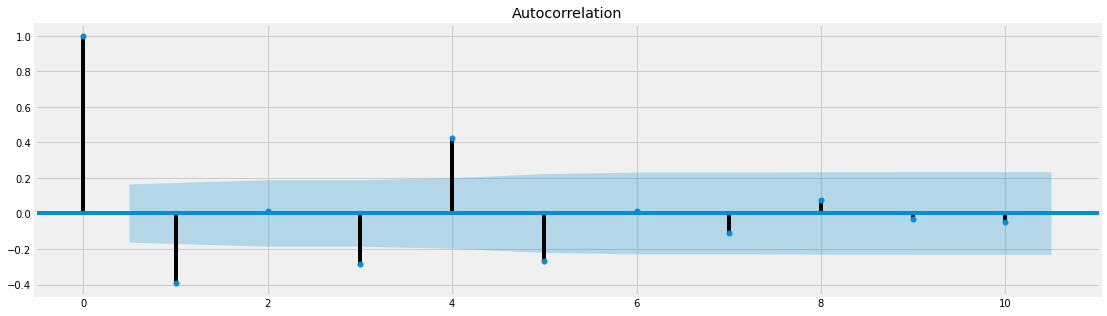

In [ ]:
#Loading and plotting acf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_boxcox_difference, ax=plt.gca(), lags=10)
plt.show()

## Partial Auto Correleation Function (PACF) ([ToC](#TOC))<a class="anchor" id="TSF-PACF"></a>
Partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

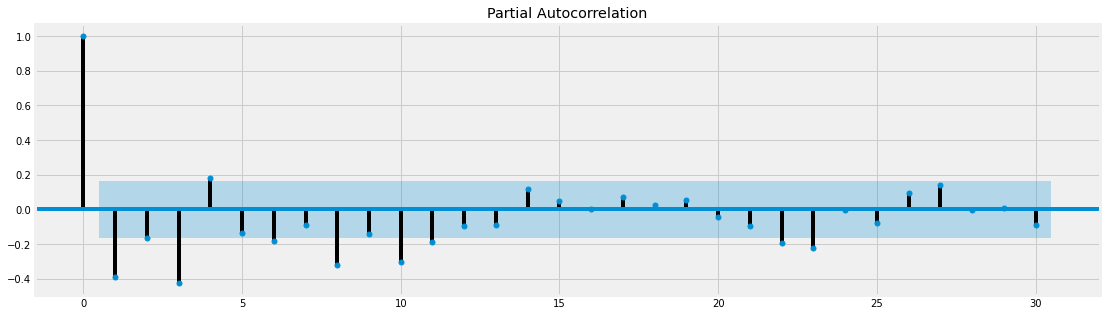

In [ ]:
#Loading and plottin pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_boxcox_difference, ax=plt.gca(), lags=30)
plt.show()

## Splitting the Train and Test data

In [18]:
length_train = 115 # 115/140

train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]
train_data_boxcox = data_boxcox[:length_train]
test_data_boxcox = data_boxcox[length_train:]
train_data_boxcox_difference = data_boxcox_difference[:length_train-1] # Because it cannot compute the difference for the first row
test_data_boxcox_difference = data_boxcox_difference[length_train-1:] # Because it cannot compute the difference for the first row

# (Simple) Auto Regressive Model
Regressive model is forecasting the future observations as a linear regression of one or more past observations.

This model has a parameter called “p” which is the lag order p that means p is the maximum number of lags that we consider in order to forecast the future observations.

Suppose, the highest order lag is 10.
2nd, 4th and 6th have significant correlation with future observations (known by plotting partial ACF).
Autoregressive model equation would be

y(t) = β_0 + β_1 y(t-2) + β_2 y(t-4) + β_3 y(t-6)

y(t-2), y(t-4) and y(t-6) are the independent variables.

In [19]:
from statsmodels.tsa.arima_model import ARIMA # Auto Regressive, Inverse, Moving Average 

model_ar = ARIMA(train_data_boxcox_difference, order=(1,0,0)) # (p(AR),d(I),q(MA))
model_fit = model_ar.fit()
print(model_fit.params)

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.

  % freq, ValueWarning)


const      0.012440

ar.L1.y   -0.398536

dtype: float64


## Recover Original Time Series

In [20]:
y_ar_new = data_boxcox_difference.copy()
y_ar_new['ar_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                              data_boxcox_difference.index.max())

y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox_difference'].cumsum()
y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox'].add(data_boxcox[0])
y_ar_new['ar_forecast'] = np.exp(y_ar_new['ar_forecast_boxcox'])

## Plotting Train, Test and Forecast
* It is not capturing the seasonality, but it captured the trend

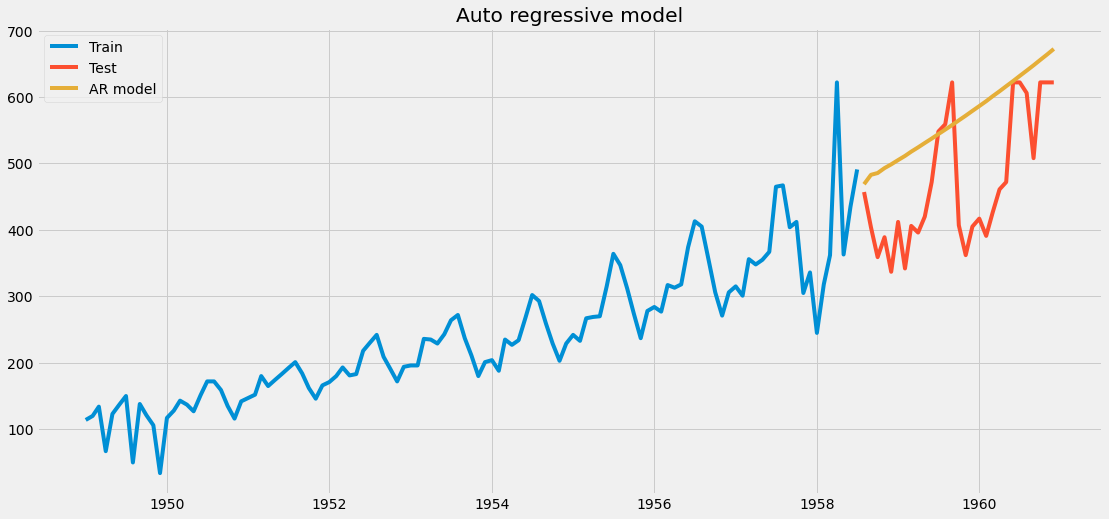

In [21]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_ar_new['ar_forecast'][test.index.min():], label = 'AR model')

plt.legend()
plt.title('Auto regressive model')
plt.show()

# Moving Average Method
In Moving Average Model, we consider the past forecasted errors to forecast the future values.

The moving average model has a parameter called “q” which is the size of the moving average window over which linear combinations of errors are calculated.

The mathematical equation is:-

y(t) = µ + φ(k)*ε(t-k)

µ is the mean of the series

ε(t-k) is the past forecasted value

φ(k) is the weight associated with error value


In [22]:
#from statsmodels.tsa.arima_model import ARIMA

model_ma = ARIMA(train_data_boxcox_difference, order=(0,0,7)) # q=7
model_fit = model_ma.fit()
print(model_fit.params)

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.

  % freq, ValueWarning)


const      0.012553

ma.L1.y   -0.539879

ma.L2.y   -0.200034

ma.L3.y   -0.146816

ma.L4.y    0.627896

ma.L5.y   -0.310058

ma.L6.y   -0.113329

ma.L7.y   -0.317780

dtype: float64


## Recover Original Series

In [23]:
y_ma_new = data_boxcox_difference.copy()
y_ma_new['ma_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                              data_boxcox_difference.index.max())
y_ma_new['ma_forecast_boxcox'] = y_ma_new['ma_forecast_boxcox_difference'].cumsum()
y_ma_new['ma_forecast_boxcox'] = y_ma_new['ma_forecast_boxcox'].add(data_boxcox[0])
y_ma_new['ma_forecast'] = np.exp(y_ma_new['ma_forecast_boxcox'])

## Plotting Train, Test and Forecast

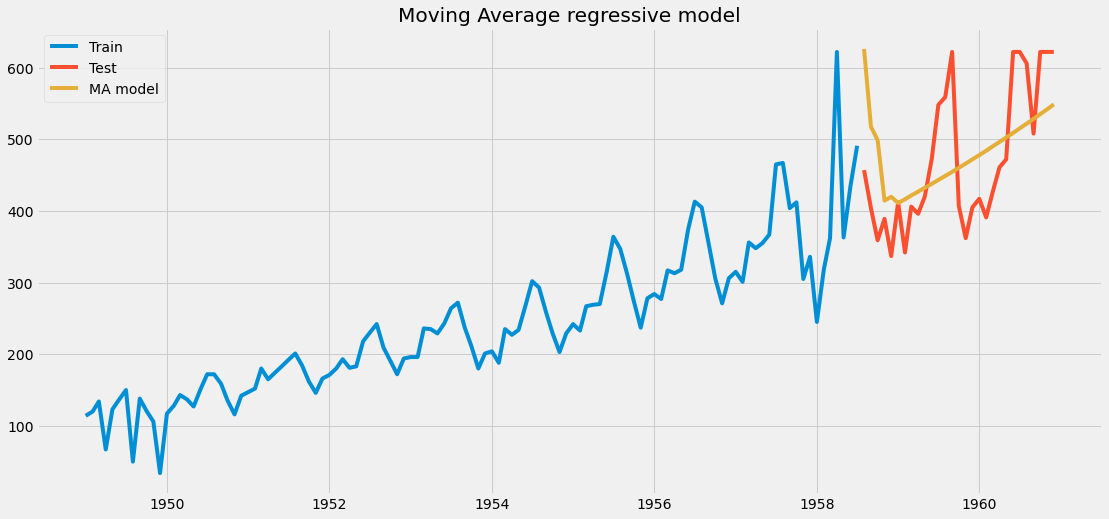

In [24]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_ma_new['ma_forecast'][test.index.min():], label = 'MA model')

plt.legend()
plt.title('Moving Average regressive model')
plt.show()

# Auto Regressive Moving Average Model (ARMA)
* ARMA Model combines both AR and MA model.
* It takes into account one or more past observations as well as the past errors.
* The ARMA model contains two parameters p and q, which can be determined using ACF & PACF
* p is the highest lag in the time series
* q is the number of past errors included
* Equation for ARMA Model (p=q=1):
 * y(t) = ß0 + ß1*y(t-1) + Ψ1𝛆(t-1)
   * y(t) is the Future Observation
   * ß0 is the Intercept
   * y(t-1) is the lag value
   * ß1 is the weight associated
   * Ψ1 is the weight associated with error
   * 𝛆(t-1) is the error Value.

In [39]:
from statsmodels.tsa.arima_model import ARIMA

model_arma = ARIMA(train_data_boxcox_difference, order=(1,0,5))
model_fit = model_arma.fit()
print(model_fit.params)

const      0.024012
ar.L1.y   -0.624300
ma.L1.y    1.048754
ma.L2.y   -0.630219
ma.L3.y   -1.266233
ma.L4.y   -0.347308
ma.L5.y    0.195173
dtype: float64


# Recover Original Time Series Data

In [40]:
y_arma_new = data_boxcox_difference.copy()
y_arma_new['arma_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                  data_boxcox_difference.index.max())
y_arma_new['arma_forecast_boxcox'] = y_arma_new['arma_forecast_boxcox_difference'].cumsum()
y_arma_new['arma_forecast_boxcox'] = y_arma_new['arma_forecast_boxcox'].add(data_boxcox[0])
y_arma_new['arma_forecast'] = np.exp(y_arma_new['arma_forecast_boxcox'])

# Plotting Train, Test and Forecast
* It is not capturing the seasonality, but it captured the trend

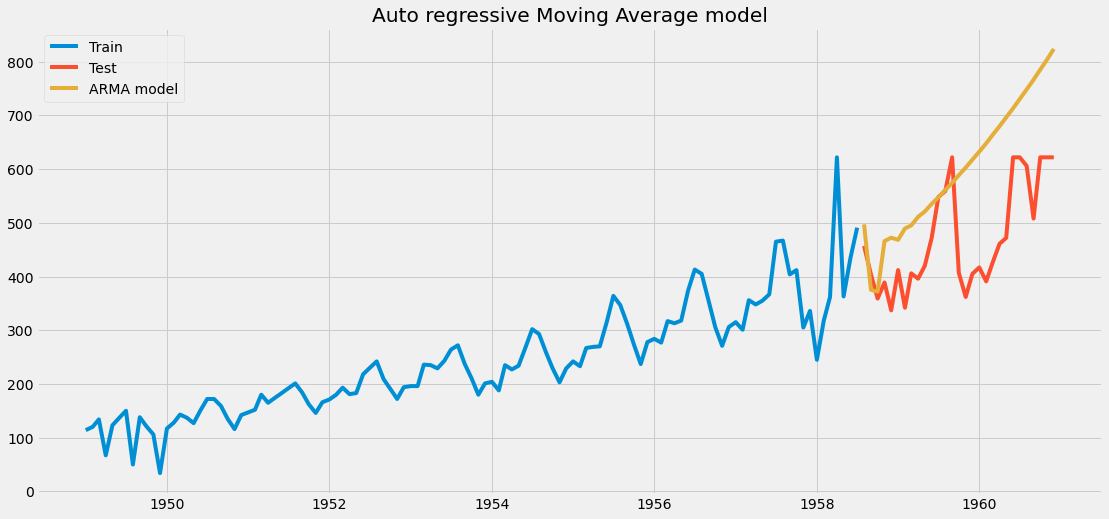

In [41]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_arma_new['arma_forecast'][test.index.min():], label = 'ARMA model')

plt.legend()
plt.title('Auto regressive Moving Average model')
plt.show()

# Auto Regressive Integrated Moving Average Model (ARIMA)

* We transform the time series using Box Cox and then the model itself takes care of the differencing and remove the trend from the time series (**We do not need to do differencing**).
* We have three parameters to be used:-
 * p is the highest lag in the model (determined using ACF)
 * d is the degree of differencing to make the series stationary (determined using stationary tests, e.g., ADF, and KPSS, to make sure the time-series is converted to stationary)
 * q is the number of past errors terms included (determined using PACF)
* The mathematical equation for ARIMA Model
 * ▲y(t) = θ1 *▲y(t-1) + φ1*𝛆(t-1) + 𝛆(t)
   * Where, ▲y(t-1) = ▲y(t+1) - y(t)  
   * θ1 is the weight associated 
   * 𝛆(t-1) is the error term
   * φ1 is the weight associated with error term

In [12]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data_boxcox, order=(5,1,2))
model_fit = model.fit()
print(model_fit.params)

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        0.013211
ar.L1.D.y    1.023382
ar.L2.D.y   -0.305348
ar.L3.D.y   -0.293684
ar.L4.D.y    0.548231
ar.L5.D.y   -0.631379
ma.L1.D.y   -1.888935
ma.L2.D.y    1.000000
dtype: float64


C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Recover Time Series Data

In [13]:
y_arima_new = data_boxcox_difference.copy()
y_arima_new['arima_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                    data_boxcox_difference.index.max())
y_arima_new['arima_forecast_boxcox'] = y_arima_new['arima_forecast_boxcox_difference'].cumsum()
y_arima_new['arima_forecast_boxcox'] = y_arima_new['arima_forecast_boxcox'].add(data_boxcox[0])
y_arima_new['arima_forecast'] = np.exp(y_arima_new['arima_forecast_boxcox'])

# Plotting Train, Test and Forecast
* It is not capturing the seasonality

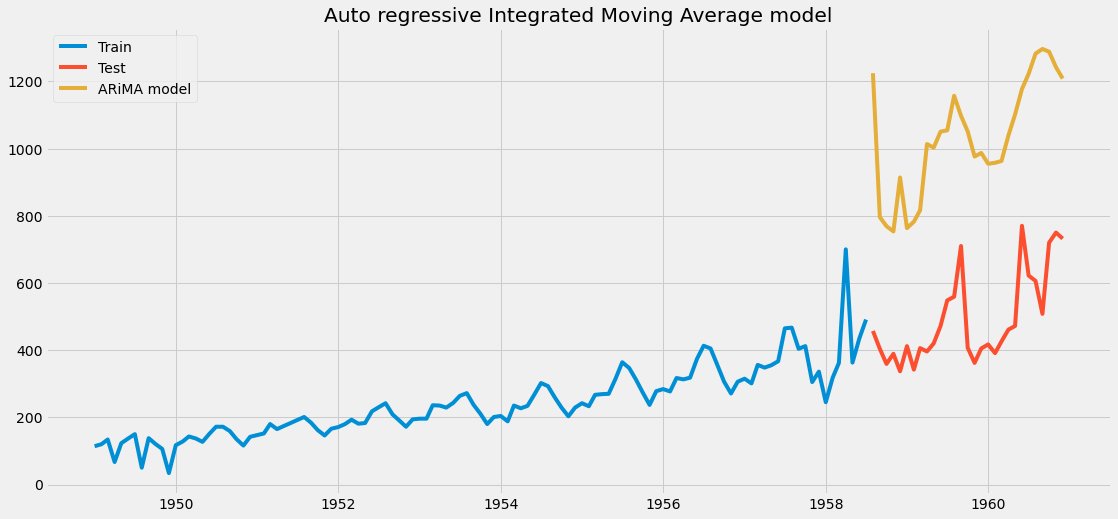

In [14]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_arima_new['arima_forecast'][test.index.min():], label = 'ARiMA model')

plt.legend()
plt.title('Auto regressive Integrated Moving Average model')
plt.show()

# Seasonal Auto Regressive Integrated Moving Average Model (SARIMA)

SARIMA model brings all the features of ARIMA model along with the seasonality.

The key elements performed in SARIMA are:-

1. The time series is differenced to make it stationary.
2. The SARIMA equation is a linear combination of past observations and past errors.
3. Seasonal differencing is performed on the time series.
4. SARIMA models future seasonality as a linear combination of past seasonality observations and past seasonality errors.
5. parameters P, Q, D, m (ACF, PACF, or stationary tests cannot be used, grid search is used to find the optimum parameters):
 * m - the number of time steps for a single seasonal period;
 * P - the seasonal autoregressive order (0<=P<=4);
 * D - the seasonal difference order (D=0, 1, 2);
 * Q - the seasonal moving average order (0<=Q<=4).

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox_difference, order=(1,1,1), seasonal_order=(1,1,1,6))
model_fit = model.fit()
print(model_fit.params) # sigma2 is intercept

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1     -0.570245
ma.L1     -0.998473
ar.S.L6   -0.736076
ma.S.L6   -0.521615
sigma2     0.052073
dtype: float64


# Recover Original Time Series Data

In [19]:
y_sarima_new = data_boxcox_difference.copy()
y_sarima_new['sarima_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                      data_boxcox_difference.index.max())
y_sarima_new['sarima_forecast_boxcox'] = y_sarima_new['sarima_forecast_boxcox_difference'].cumsum()
y_sarima_new['sarima_forecast_boxcox'] = y_sarima_new['sarima_forecast_boxcox'].add(data_boxcox[0])
y_sarima_new['sarima_forecast'] = np.exp(y_sarima_new['sarima_forecast_boxcox'])

# Plotting Train, Test and Forecasted data
* The SARIMA model captures trend and seasonality of the original data

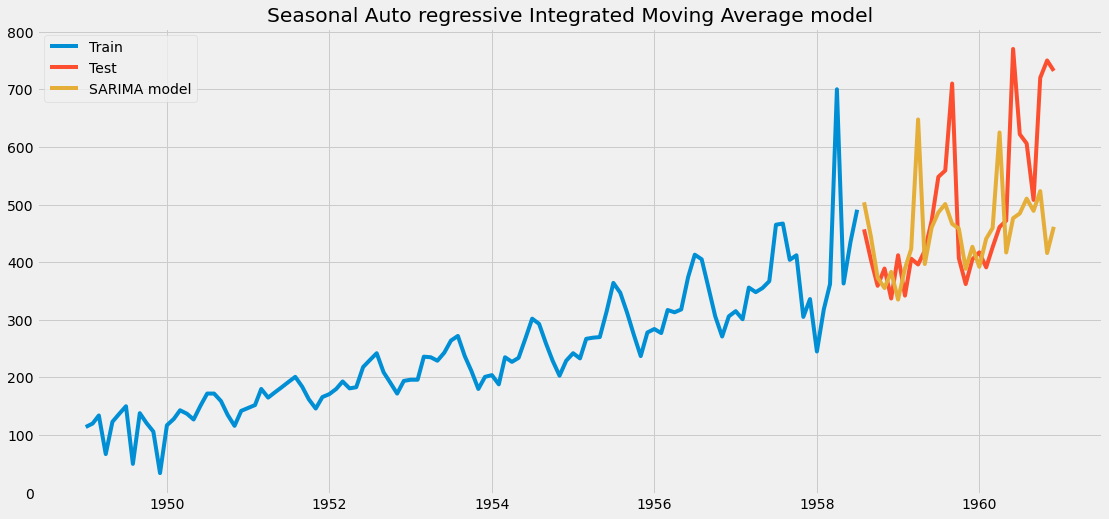

In [20]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_sarima_new['sarima_forecast'][test.index.min():], label = 'SARIMA model')

plt.legend()
plt.title('Seasonal Auto regressive Integrated Moving Average model')
plt.show()

## ARIMAX Model
* ARIMAX model works similar to ARIMA Model.
* ARIMAX model has an additional external variable (no extra parameter, but extra variable).
* X = Exogenous
* The external variable, which has relationship with the time-series, helps to forcast better based on some external factors.
* p, d and q  are the parameters of ARIMAX Model.
* p and q can be determined by Autocorrelation and Partial Correlation functions.
* d can be determined by level of stationarity in the data.
* ARIMAX(2, 1, 1)
  * 2nd order Autoregressive model
  * 1st order moving average component
  * Series has been differenced once to induce stationarity.


In [2]:
dataClimate = pd.read_csv("Climate.csv")

In [5]:
dataClimate['date'] = pd.to_datetime(dataClimate['date'],format="%Y-%m")
dataClimate = dataClimate.set_index('date')

In [6]:
dataClimate.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [18]:
dataClimate.shape

(1462, 4)

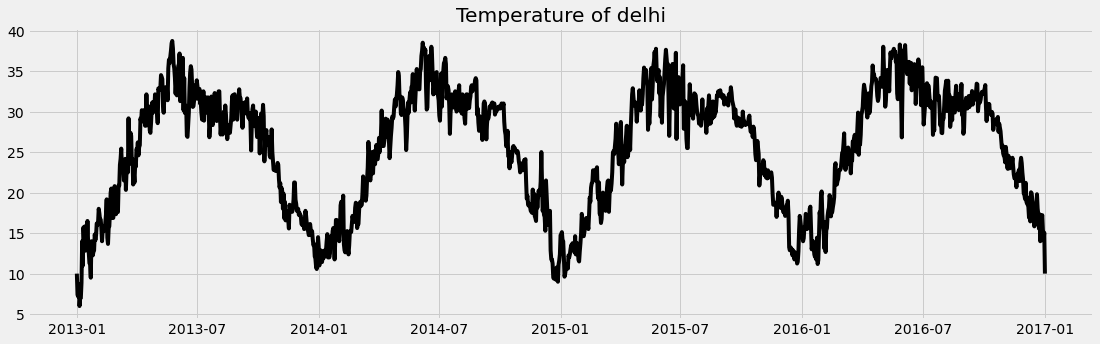

In [9]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(dataClimate['meantemp'],color='black')
plt.title("Temperature of delhi")
plt.show()

## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

For KPSS test,

The Null Hypothesis : The series is stationary when p-value >0.05 Alternate Hypothesis: The series is not stationary when p-value <= 0.5

In [14]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(dataClimate['meantemp'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

KPSS Statistic: 0.1948270141059301
p-value: 0.1
num lags: 24
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


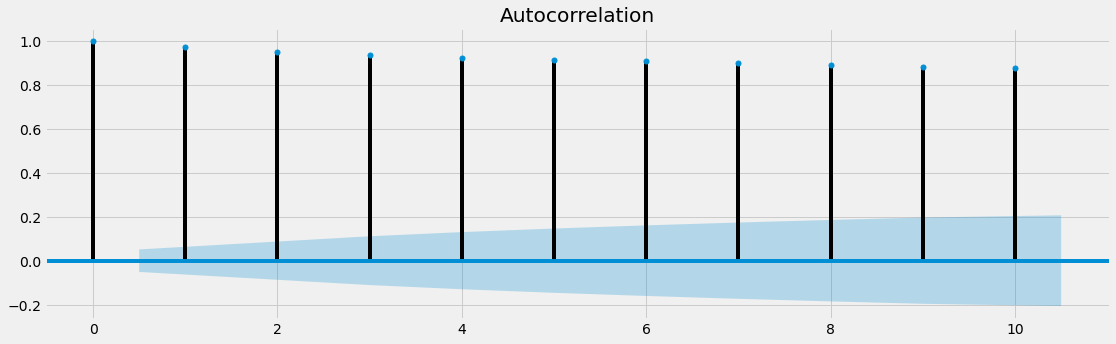

In [16]:
#Loading and plotting acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataClimate['meantemp'], ax=plt.gca(), lags=10)
plt.show()

### Partial correlation function

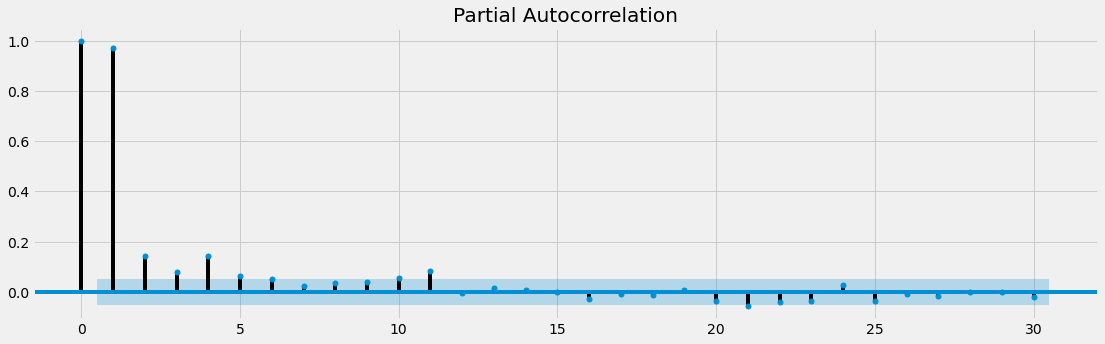

In [17]:
#Loading and plottin pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dataClimate['meantemp'], ax=plt.gca(), lags=30)
plt.show()

In [19]:
length_trainClimate = 1046
trainClimate = dataClimate.iloc[:length_trainClimate,:]
testClimate =dataClimate.iloc[length_trainClimate:,: ]

In [21]:
trainClimate.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


## ARIMAX model

In [30]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(trainClimate['meantemp'], order=(1,0,3), exog= trainClimate['humidity'])
model_fit = model.fit()
print(model_fit.params)

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


const             31.254084
humidity          -0.132910
ar.L1.meantemp     0.995058
ma.L1.meantemp    -0.093103
ma.L2.meantemp    -0.170477
ma.L3.meantemp    -0.194071
dtype: float64


In [31]:
y_arimax = dataClimate.copy()
y_arimax['arimax_forecast'] = model_fit.predict(testClimate['meantemp'].index.min(),
                                                testClimate['meantemp'].index.max(),
                                                exog= testClimate['humidity'])

### Plot train, test and forecast

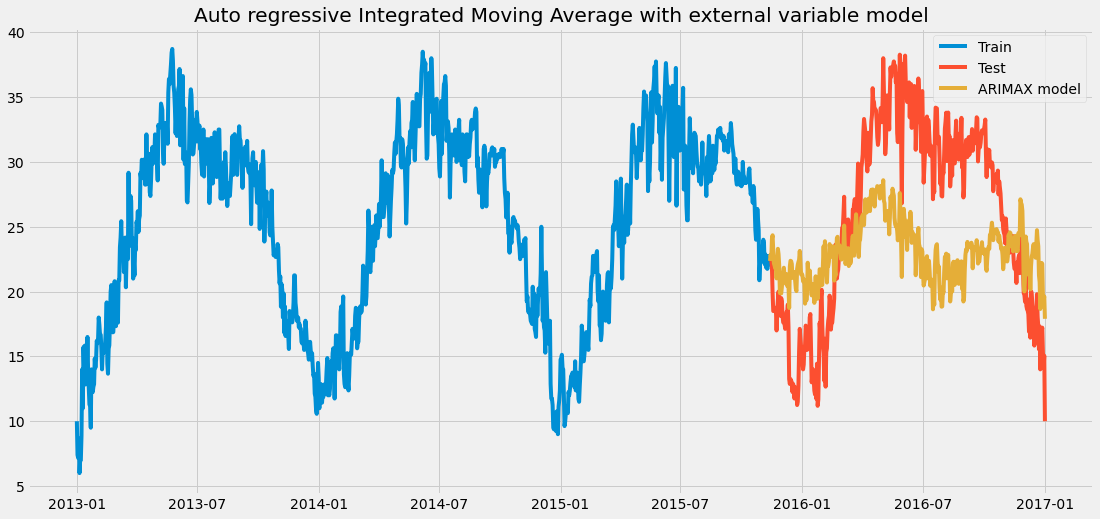

In [32]:
plt.figure(figsize=(17,8))

plt.plot(trainClimate['meantemp'], label = 'Train')
plt.plot(testClimate['meantemp'], label = 'Test')
plt.plot(y_arimax['arimax_forecast'][testClimate['meantemp'].index.min():], 
         label = 'ARIMAX model')

plt.legend()
plt.title('Auto regressive Integrated Moving Average with external variable model')
plt.show()

## SARIMAX Model
* The SARIMAX model is the model which along with the seasonal and non-seasonal components, also models an external variable.
* SARIMAX(p, d, q)(P, D, Q, s)
* X = Exogenous
* The SARIMAX model has an extra term αx(t) which indicates the external variable and α  denotes the weight associated with it.
* SARIMAX Model has all the features of SARIMA.
* Performs seasonal differencing to make data stationary over the season.
* Models future observations as a linear regression of past observations, past seasonal errors, and the external variable, which has relationship with the time-series.

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(trainClimate['meantemp'], order=(7,0,3), seasonal_order=(2,1,1,12), exog =trainClimate['humidity'])
model_fit = model.fit()
print(model_fit.params)

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


humidity   -0.131444
ar.L1      -1.271635
ar.L2      -0.177446
ar.L3       0.867326
ar.L4       0.767982
ar.L5       0.260044
ar.L6       0.377432
ar.L7       0.176123
ma.L1       2.197999
ma.L2       2.126830
ma.L3       0.895488
ar.S.L12    0.030005
ar.S.L24    0.030971
ma.S.L12   -0.982502
sigma2      1.571901
dtype: float64


In [13]:
y_sarimax = dataClimate.copy()
y_sarimax['sarimax_forecast'] = model_fit.predict(testClimate['meantemp'].index.min(),
                                                  testClimate['meantemp'].index.max(),
                                                  exog= testClimate['humidity'])

## Plotting Train, Test and Forecasted data

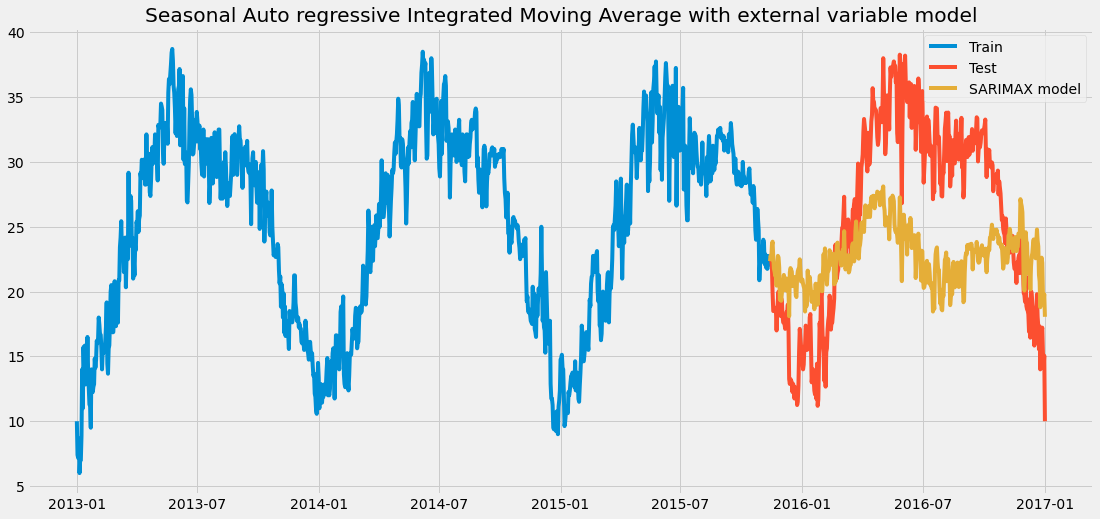

In [14]:
plt.figure(figsize=(17,8))

plt.plot(trainClimate['meantemp'], label = 'Train')
plt.plot(testClimate['meantemp'], label = 'Test')
plt.plot(y_sarimax['sarimax_forecast'][testClimate['meantemp'].index.min():], label = 'SARIMAX model')

plt.legend()
plt.title('Seasonal Auto regressive Integrated Moving Average with external variable model')
plt.show()

## Some tips
* Exponential models: good for noisy TS 
* It is Necessary to decompose the Time series before Applying the ARIMA or SARIMA Model
* For TS with seasonality: SARIMA, SARIMAX, Holt winter exponential models can be used. Holt exponential only captures the level and trend of the TS, not the seasonality.
* How to Choose the Right Model:
  * When you have data points with less than 10 values (small datasets):
    * noisy: Simple Moving Average Method (e.g., daily forcasting of stock prices)
    * noiseless without seasonality: Naive Method (e.g., forcasting the sales of a grocery store that opened recently)
    * noiseless with seasonality: seasonal Naive Method (e.g., forcasting the sales of a newly-opened store on a monthly basis)
  * When you have data points with more than 10 values (large datasets):
    * level: Simple Exponential Smoothing
    * Level+Trend: Holt Exponential Smoothing, ARIMA
    * Level+Trend+Seasonality: Holt Winter Exponential Smoothing, SARIMA
    * Exogenous Variable+Level+Trend+Seasonality: ARIMAX, SARIMAX 
* Best Practices for choosing a right Time Series Model:
  * Always get rid of Missing values: prefer either linear or seasonal interpolation method.
  * Always get rid of outliers.
  * Always check for stationarity whenever you want to apply AR models (misleading results if TS is non-stationary):
      * box cox transformation to remove seasonality;
      * differencing to remove trend.
  * There is no model which works well for all scenarios and there is no model which is completely wasteful. Every model has their own significance. Choose the right kind of model that fits your requirements.
  * Always use performance metrics to compare the results produced by these time series models.
* [Different Types of Time Series Decomposition](https://towardsdatascience.com/different-types-of-time-series-decomposition-396c09f92693)
* Additive decompostion: when the seasonal component is constant over time.
* Multiplicative decompostion: when the seasonal component is growing with respect to the time

## Why is evaluating models important?
* We can understand and analyze whether the model’s performance is bad, average or good.
* When we have two or more than two best models, we can compare the working of these models and can determine which among all the models is the best for a particular scenario.
* These evaluation or performance metrics help us to justify the predictions or forecasting.
* Evaluation metrics tell us how much errors our model can make so that we have a certain level of confidence in our models.
* evaluation or performance metrics:
    * Mean Forecast Error (MFE):
        * Mean Forecast Error shows deviation of the forecast from the actual demand.
        * This is the mean of the sum of all the differences between the actual values and forecasted values.
        * Even if there is large forcasting error, their average can sum up to zero, i.e., positive and negative values cancel out each other, so can give wrong intuition about the model
        * Leads to over/underestimated errors
    * Mean Absolute Error (MAE):
        * It takes the absolute values of the differences between actual values and forecasted values.
    * Mean Absolute Percentage Error (MAPE):
        * Mean Absolute Percentage Error calculates the percentage of mean absolute error to get a clear idea of how much the forecasted values deviates from the actual values.
    * Root Mean Squared Error (RMSE):
        * Root Mean Square Error is equal to the root of the Mean Square error in order to bring error value to the same dimension.

# Naive Method
The naive method is the simplest method of all forecasting methods. It looks at the last historical data and extrapolates it for all the future values without adjusting or attempting to establish causal factors.

In [14]:
y_naive = test.copy()
y_naive['forecasted_naive'] = train['Customers'][length_train-1]

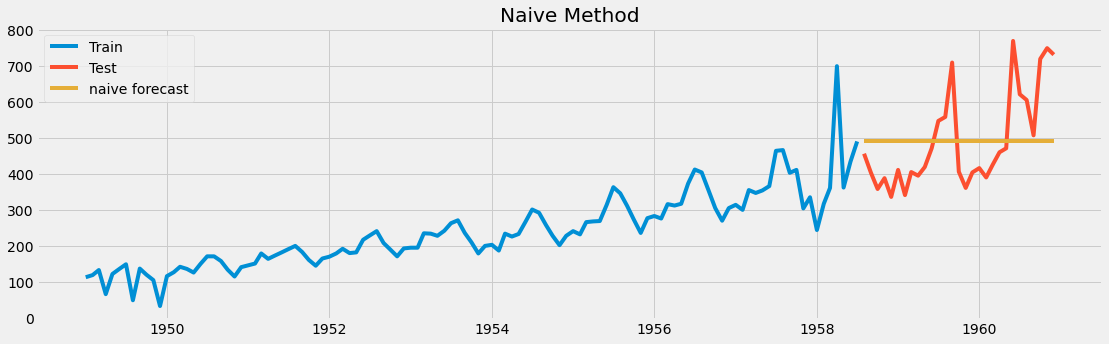

In [15]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_naive['forecasted_naive'], label = 'naive forecast')

plt.legend()
plt.title('Naive Method')
plt.show()

# Simple Average Method
In this method, we take the future predictions equal to the average of all the historical data.

In [16]:
y_avg = test.copy()

y_avg['forecasted_avg'] = train['Customers'].mean()

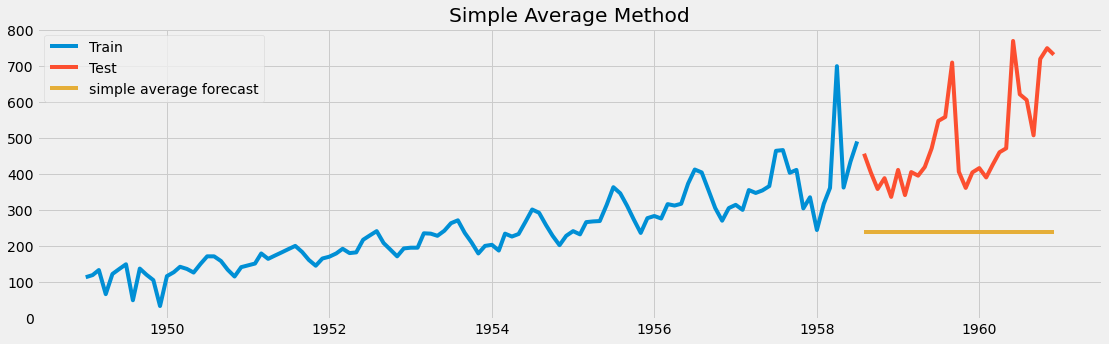

In [17]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_avg['forecasted_avg'], label = 'simple average forecast')

plt.legend()
plt.title('Simple Average Method')
plt.show()

In [36]:
mfe = np.round(np.mean(test['Customers']-y_avg['forecasted_avg']),2)
mfe

251.1

In [38]:
mae = np.round(np.mean(np.abs(test['Customers']-y_avg['forecasted_avg'])),2)
mae

251.1

In [40]:
mape = np.round(np.mean(np.abs(test['Customers']-y_avg['forecasted_avg'])/test['Customers'])*100,2)
mape

47.94

In [42]:
from sklearn.metrics import mean_squared_error
rmse = np.round(np.sqrt(mean_squared_error(test['Customers'], y_avg['forecasted_avg'])),2)
rmse

283.62

# Simple Moving Average Method
In this method, we take the future predictions equal to the average of a moving window. A window can be a time period of 3 months, 6 months, 9 months or 1 year.

In [20]:
y_moving = data.copy()

window = 9
y_moving["moving_average_forecast"] = data['Customers'].rolling(window).mean()
y_moving['moving_average_forecast'][length_train:] = y_moving['moving_average_forecast'][length_train-1]

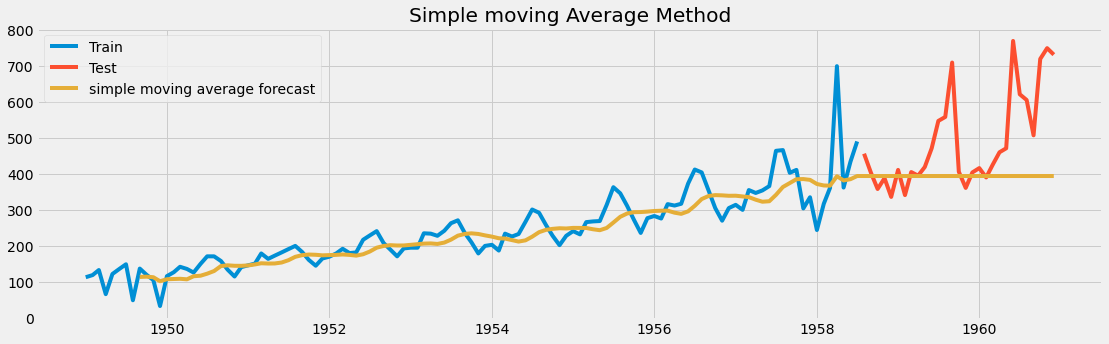

In [21]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_moving['moving_average_forecast'], label = 'simple moving average forecast')

plt.legend()
plt.title('Simple moving Average Method')
plt.show()

# Simple Exponential Smoothing


In [22]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Customers'])
model_fit = model.fit(smoothing_level=0.2)
model_fit.params
y_exp = test.copy()
y_exp['Exponential_forecast'] = model_fit.forecast(24)

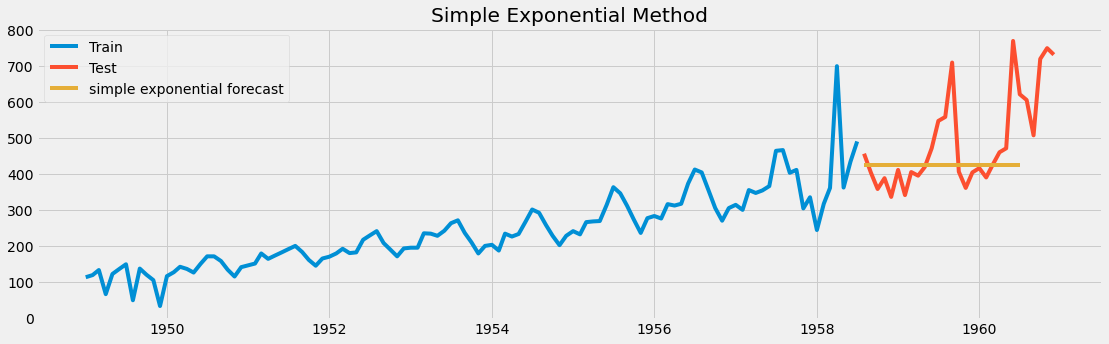

In [23]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_exp['Exponential_forecast'], label = 'simple exponential forecast')

plt.legend()
plt.title('Simple Exponential Method')
plt.show()

# Holt Exponential Smoothing
Holt’s exponential smoothing captures the level and trend of time series in the forecast.

The forecast equation is a function of both level and trend.

y(t+1) = l(t) +b(t) 

Where l(t) is the level component and b(t) is the trend component.

The trend component is calculated as shown

b(t) = β(l(t) - l(t-1)) + (1-β)b(t-1) 

Here beta is the smoothing parameter for trend.


In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['Customers'], seasonal_periods=12, trend='multiplicative')
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04)
model_fit.params
y_holtexponential = test.copy()
y_holtexponential['holtexponential_forecast'] = model_fit.forecast(24)

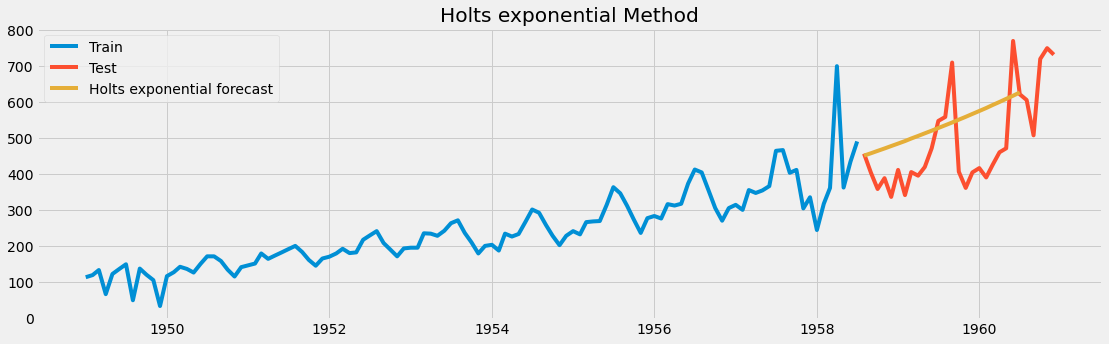

In [25]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtexponential['holtexponential_forecast'], label = 'Holts exponential forecast')

plt.legend()
plt.title('Holts exponential Method')
plt.show()

# Holt Winter Exponential Smoothing
This techniques forecasts based on level, trend and seasonality.
The forecast equation for this method includes seasonality.
	
y(t+1) = l(t)+b(t)+s(t+1-m) 
Here m is the number of time a season repeats in a time period.

In [32]:
model = ExponentialSmoothing(train['Customers'], seasonal_periods=12, trend='multiplicative', seasonal='additive')
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04)
model_fit.params
y_holtwinter = test.copy()
y_holtwinter['holtwinter_forecast'] = model_fit.forecast(36)

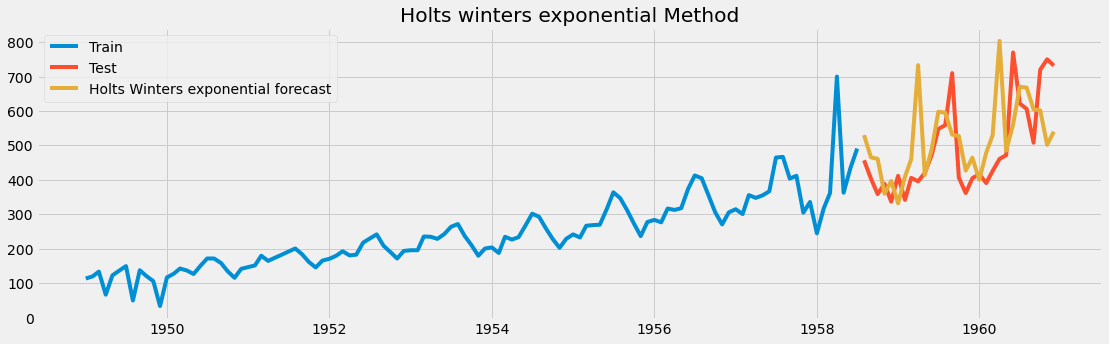

In [33]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtwinter['holtwinter_forecast'], label = 'Holts Winters exponential forecast')

plt.legend()
plt.title('Holts winters exponential Method')
plt.show()

In [37]:
mfe = np.round(np.mean(test['Customers']-y_holtwinter['holtwinter_forecast']),2)
mfe

-26.94

In [39]:
mae = np.round(np.mean(np.abs(test['Customers']-y_holtwinter['holtwinter_forecast'])),2)
mae

101.23

In [41]:
mape = np.round(np.mean(np.abs(test['Customers']-y_holtwinter['holtwinter_forecast'])/test['Customers'])*100,2)
mape

20.64

In [43]:
rmse = np.round(np.sqrt(mean_squared_error(test['Customers'], y_holtwinter['holtwinter_forecast'])),2)
rmse

133.62